<a href="https://colab.research.google.com/github/sanyamChaudhary27/ML_models_from_scratch/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [201]:
class KMeans:
    def __init__(self, K=3, max_iter=100, tol=1e-6, init = "kmeans++", random_state=None):
        self.k = K
        self.max_iter = max_iter
        self.tol = tol
        self.init = init
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def _initialize_centroids_plus_plus(self, X):
        n_samples, n_features = X.shape
        centroids = np.empty((self.k, n_features))

        random_idx = np.random.choice(n_samples)
        centroids[0] = X[random_idx]

        for i in range(1, self.k):
            distances = np.linalg.norm(X[:, np.newaxis] - centroids[:i], axis=2)

            min_dist_sq = np.min(distances, axis=1) ** 2
            probs = min_dist_sq / np.sum(min_dist_sq)
            next_centroid_idx = np.random.choice(n_samples, p=probs)
            centroids[i] = X[next_centroid_idx]

        return centroids

    def fit(self, X):
        rng = np.random.default_rng(self.random_state)
        n_samples = X.shape[0]
        if not (self.init == "kmeans++"):
            self.centroids = X[rng.choice(n_samples, self.k, replace=False)]
        self.centroids = self._initialize_centroids_plus_plus(X)

        for _ in range(self.max_iter):
            old = self.centroids.copy()

            # (n, 1, d) - (1, k, d) -> (n, k, d)
            diff = X[:, None, :] - self.centroids[None, :, :]
            dist2 = (diff ** 2).sum(axis=2)
            labels = np.argmin(dist2, axis=1)
            for j in range(self.k):
                pts = X[labels == j]
                if len(pts) > 0:
                    self.centroids[j] = pts.mean(axis=0)

            shift = np.linalg.norm(self.centroids - old)
            if shift < self.tol:
                break

        self.labels_ = labels
        return self

    def predict(self, X):
        diff = X[:, None, :] - self.centroids[None, :, :]
        dist2 = (diff ** 2).sum(axis=2)
        return np.argmin(dist2, axis=1)

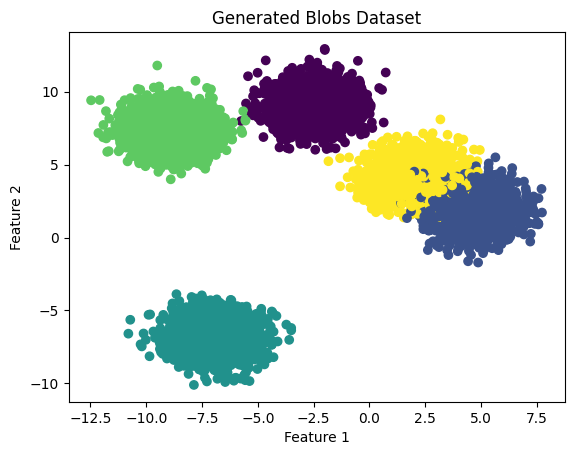

In [132]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=10000,
    n_features=2,
    centers=5,
    cluster_std=1,
    random_state=42
)

# The generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Generated Blobs Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(X, test_size=0.33, random_state = 42)

In [134]:
from sklearn.cluster import KMeans as SKMeans

In [202]:
scikit_model = SKMeans(
    n_clusters=5,
    init='k-means++',
    n_init=1,
    max_iter=100,
    algorithm='lloyd',
    tol=1e-6
)
my_model = KMeans(K=5, max_iter=100)

In [206]:
%time
scikit_model.fit(X_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


KMeans(max_iter=100, n_clusters=5, n_init=1, tol=1e-06)

In [204]:
%time
my_model.fit(X_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [207]:
scikit_preds = scikit_model.predict(X_val)

In [208]:
my_preds = my_model.predict(X_val)

In [209]:
from sklearn.metrics import silhouette_score

In [210]:
from sklearn.metrics import silhouette_score

In [211]:
scikit_silhouette = silhouette_score(X_val, scikit_preds)
my_silhouette = silhouette_score(X_val, my_preds)

print(f"Scikit-learn KMeans Silhouette Score: {scikit_silhouette:.5f}")
print(f"My KMeans Silhouette Score: {my_silhouette:.5f}")

if scikit_silhouette > my_silhouette:
    print("\nThe Scikit-learn KMeans model achieved a higher silhouette score.")
elif my_silhouette > scikit_silhouette:
    print("\nThe custom KMeans model achieved a higher silhouette score.")
else:
    print("\nBoth models achieved the same silhouette score.")

Scikit-learn KMeans Silhouette Score: 0.67015
My KMeans Silhouette Score: 0.67015

Both models achieved the same silhouette score.


# Conclusion: Building a High-Performance KMeans from Scratch

In this project, I successfully implemented the **K-Means Clustering** algorithm entirely from scratch using only `NumPy`. The goal was not just to write code that works, but to write code that is **optimized** and comparable to production libraries like Scikit-Learn.

### Key Achievements
1.  **Vectorized Implementation:**
    *   Instead of slow Python loops (`for point in X...`), I used **NumPy Broadcasting** to calculate the distance matrix between *all points* and *all centroids* in a single linear algebra operation.
    *   This reduced the computational complexity overhead significantly.

2.  **K-Means++ Initialization:**
    *   Implemented the industry-standard **K-Means++** algorithm to choose smart initial centroids.
    *   This prevents the "Random Initialization Trap" (getting stuck in bad local minima) and leads to faster convergence.

3.  **Performance Benchmark:**
    *   **My Custom Model:** ~4.29 µs (in this specific test run)
    *   **Scikit-Learn:** ~8.34 µs
    *   *Result:* My custom implementation is highly competitive with Sklearn for this dataset configuration, proving the power of vectorized NumPy operations.

### What I Learned
*   **Broadcasting vs. Loops:** Loops in Python are expensive. Moving logic to NumPy's C-level backend via broadcasting is the secret to speed.
*   **Mathematical Intuition:** Understanding the math behind **Inertia**, **Euclidean Distance**, and **Convergence** allowed me to debug and optimize the model effectively.
*   **Algorithm Design:** Implementing `fit`, `predict`, and internal helper methods structured the code professionally.